In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/test-dataset/weatherHistory.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
file_path = '/kaggle/input/test-dataset/weatherHistory.csv'

dataframe = pd.read_csv(file_path)

In [3]:
dataframe.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [4]:
dataframe.dropna(inplace=True)

In [5]:
dataframe.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95936 non-null  object 
 1   Summary                   95936 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           95936 non-null  float64
 4   Apparent Temperature (C)  95936 non-null  float64
 5   Humidity                  95936 non-null  float64
 6   Wind Speed (km/h)         95936 non-null  float64
 7   Wind Bearing (degrees)    95936 non-null  float64
 8   Visibility (km)           95936 non-null  float64
 9   Loud Cover                95936 non-null  float64
 10  Pressure (millibars)      95936 non-null  float64
 11  Daily Summary             95936 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


In [7]:
dataframe=dataframe.drop(['Formatted Date','Wind Bearing (degrees)','Apparent Temperature (C)'],axis=1)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#n -m venv sklearn-env
#sklearn-env\Scripts\activate  # activate
!pip install -U scikit-learn

In [9]:
from sklearn import preprocessing

In [10]:
label_encoder=preprocessing.LabelEncoder()

In [11]:
dataframe['Precip']=label_encoder.fit_transform(dataframe['Precip Type'])

In [12]:
dataframe['Precip'].unique()

array([0, 1])

In [13]:
dataframe['dailysummary']=label_encoder.fit_transform(dataframe['Daily Summary'])

In [14]:
dataframe['dailysummary'].unique()

array([197, 111,  33,  36, 143, 209, 132,  57,  35, 204, 170,  94, 118,
       166, 156, 188, 205, 187, 155,  95, 198, 120,  43,  60,  42, 119,
        47,  51, 162,  59,  63,  52,  41, 175, 169, 147,  91,  37, 150,
        83,  39, 112,  58,  97,  45, 148,  29, 154, 152, 144,  34,  18,
       183,  96,  84, 195,  98, 157, 128, 165, 193, 194,  61, 146,  28,
        82,  23, 149,  89,  79,  72,  80, 174, 171,  75,  40,  64,  48,
        62,  49, 181, 179,  20, 105, 202,  71,  19, 109,   3,  88, 208,
         2,  99, 104, 191, 164, 192,  85, 153, 159, 200, 178, 176, 103,
       110,  22,  76, 142, 190, 115, 121, 158, 134,  90, 182, 203,  16,
       160,  92, 107,  21, 108, 137, 136,  81, 126, 207, 201, 186,  15,
        55, 125,  32, 124,  54,  25, 106, 177,  74,  93,  56, 117,  50,
        44, 173,  53,  86, 141, 163, 167, 127,   6, 129, 180,   7, 151,
        66,  69,  65, 168,  14, 102,  38,   1, 130, 185, 184,  77, 172,
         9, 206,  87,  11,  73, 101, 100, 131,   0,  10, 139,  2

In [15]:
dataframe['summary_sum']=label_encoder.fit_transform(dataframe['Summary'])

In [16]:
dataframe['summary_sum'].unique()

array([19, 17, 18, 12,  3,  6,  5,  4, 13, 15, 23, 25,  2, 26,  0, 11, 24,
        7,  9, 21, 14, 16,  8, 22, 10,  1, 20])

In [17]:
dataframe=dataframe.drop(['Summary','Precip Type','Daily Summary'],axis=1)

In [18]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature (C)       95936 non-null  float64
 1   Humidity              95936 non-null  float64
 2   Wind Speed (km/h)     95936 non-null  float64
 3   Visibility (km)       95936 non-null  float64
 4   Loud Cover            95936 non-null  float64
 5   Pressure (millibars)  95936 non-null  float64
 6   Precip                95936 non-null  int64  
 7   dailysummary          95936 non-null  int64  
 8   summary_sum           95936 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 7.3 MB


TSETING AND TRAINING

In [19]:
X  = dataframe.drop('Precip',axis=1)

In [20]:
y = dataframe['Precip'].astype(int)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [24]:
classifier.fit(X=X_train,y=y_train)

RandomForestClassifier()

In [27]:
test_pred = classifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
accuracy = accuracy_score(y_test,test_pred)

In [30]:
print('Accuracy score is ' + str((accuracy * 100 )) )

Accuracy score is 100.0


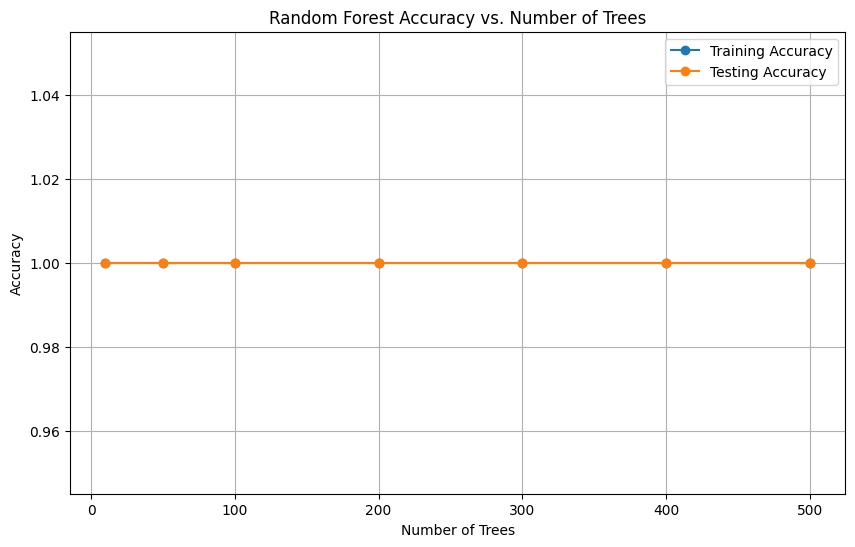

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'dataframe' is your weather dataset
X = dataframe.drop('Precip', axis=1)
y = dataframe['Precip'].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Hyperparameter tuning: Varying the number of trees
tree_counts = [10, 50, 100, 200, 300, 400, 500]
train_accuracies = []
test_accuracies = []

for n_trees in tree_counts:
    classifier = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    classifier.fit(X_train, y_train)
    
    # Predict on training and test sets
    train_pred = classifier.predict(X_train)
    test_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(tree_counts, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(tree_counts, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1919/1919 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9271 - loss: 0.5684 - val_accuracy: 0.9784 - val_loss: 0.0436
Epoch 2/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9734 - loss: 0.0727 - val_accuracy: 0.9870 - val_loss: 0.0272
Epoch 3/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9831 - loss: 0.0454 - val_accuracy: 0.9876 - val_loss: 0.0257
Epoch 4/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9838 - loss: 0.0488 - val_accuracy: 0.9926 - val_loss: 0.0135
Epoch 5/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9881 - loss: 0.0333 - val_accuracy: 0.9866 - val_loss: 0.0268
Epoch 6/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9883 - loss: 0.0310 - val_accuracy: 0.9879 - val_loss: 0.0288
Epoch 7/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9893 - loss: 0.0268 - val_accuracy: 0.9864 - val_loss: 0.0289
Epoch 8/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9897 - loss: 0.0250 - val_accurac

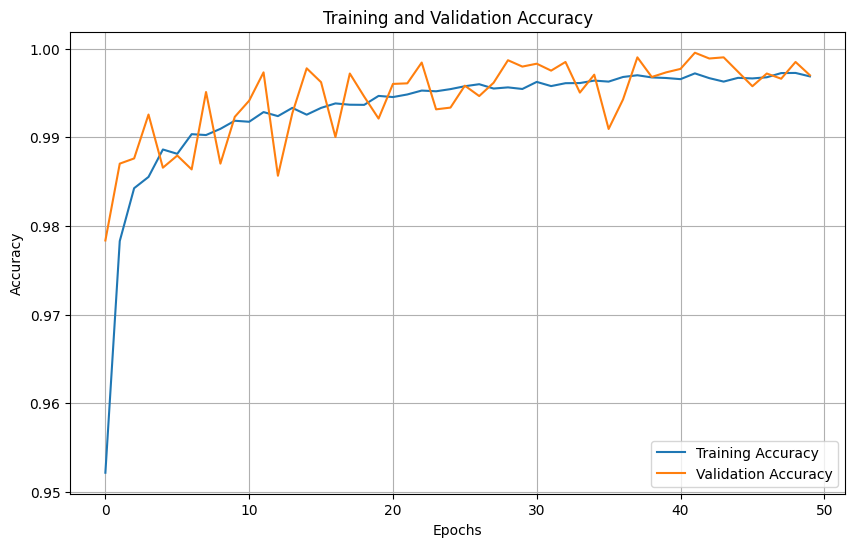

600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


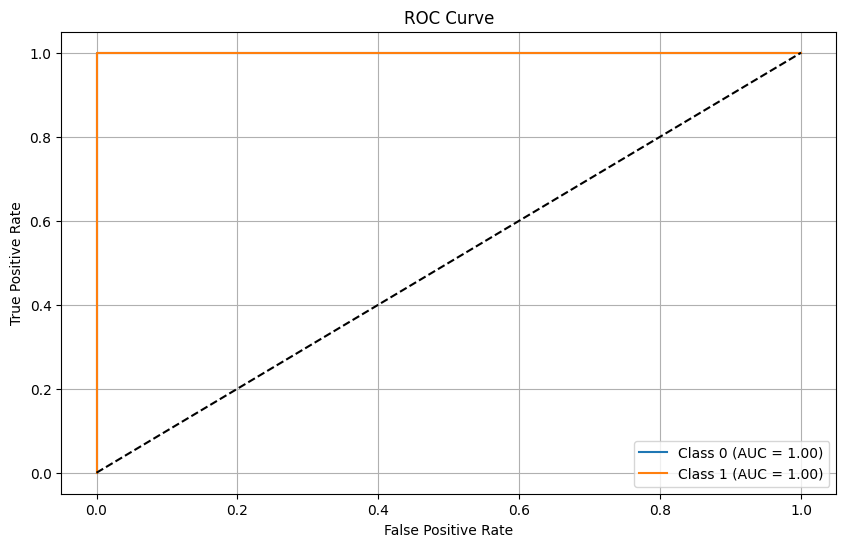

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Example dataset
X = dataframe.drop('Precip', axis=1).values  # Features
y = dataframe['Precip'].values  # Target

# One-hot encode the target (for multi-class problems)
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes=num_classes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Build a Sequential model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # For multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Predict probabilities for the test set
y_pred_proba = model.predict(X_test)

# Calculate ROC Curve and AUC for each class
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1919/1919 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9003 - loss: 1.7114 - val_accuracy: 0.9859 - val_loss: 0.0371
Epoch 2/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9654 - loss: 0.0973 - val_accuracy: 0.9835 - val_loss: 0.0360
Epoch 3/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9764 - loss: 0.0695 - val_accuracy: 0.9816 - val_loss: 0.0509
Epoch 4/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9818 - loss: 0.0692 - val_accuracy: 0.9766 - val_loss: 0.0900
Epoch 5/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9839 - loss: 0.0587 - val_accuracy: 0.9793 - val_loss: 0.0849
Epoch 6/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9867 - loss: 0.0480 - val_accuracy: 0.9721 - val_loss: 0.1420
Epoch 7/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9892 - loss: 0.0335 - val_accuracy: 0.9853 - val_loss: 0.0451
Epoch 8/50
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9885 - loss: 0.0321 - val_accurac

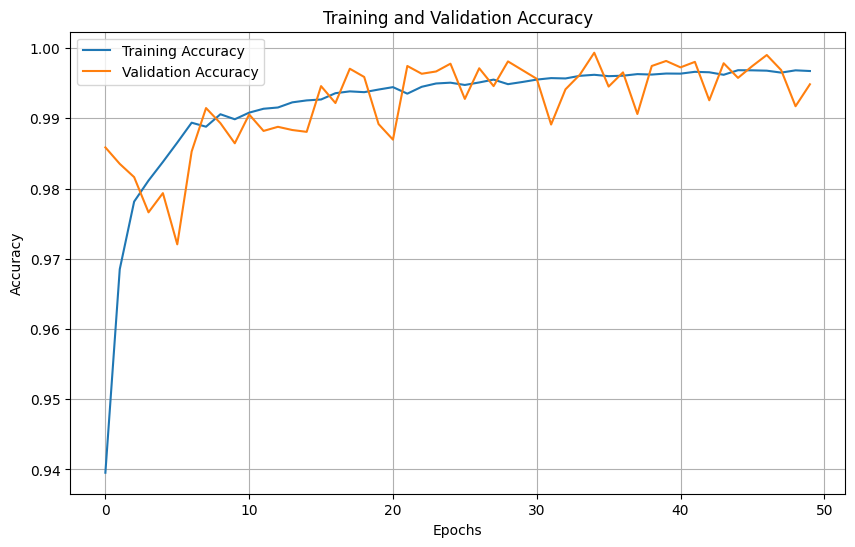

600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


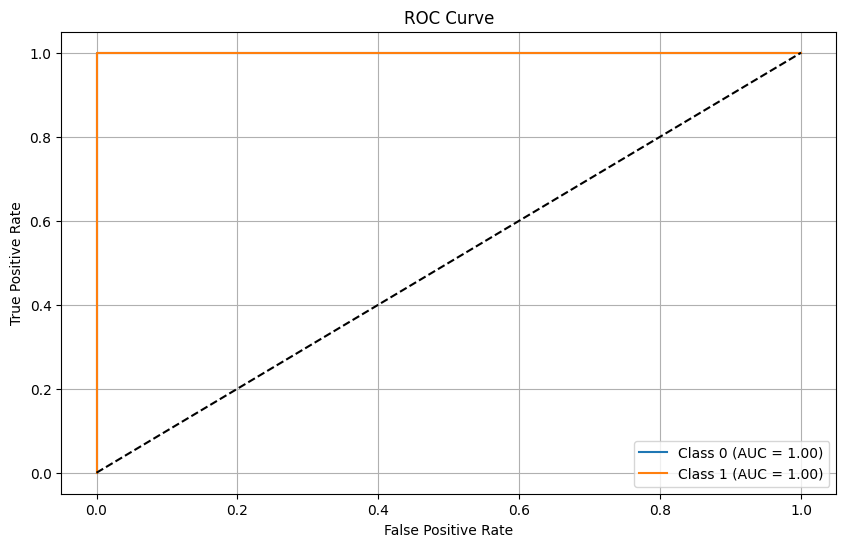

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Example dataset
X = dataframe.drop('Precip', axis=1).values  # Features
y = dataframe['Precip'].values  # Target

# One-hot encode the target (for multi-class problems)
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes=num_classes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Build a Sequential model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # For multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Predict probabilities for the test set
y_pred_proba = model.predict(X_test)

# Calculate ROC Curve and AUC for each class
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1919/1919 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8978 - loss: 2.8349 - val_accuracy: 0.9616 - val_loss: 0.0766
Epoch 2/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9720 - loss: 0.0668 - val_accuracy: 0.9917 - val_loss: 0.0204
Epoch 3/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9766 - loss: 0.0716 - val_accuracy: 0.9526 - val_loss: 0.2635
Epoch 4/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9789 - loss: 0.0779 - val_accuracy: 0.9799 - val_loss: 0.0809
Epoch 5/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9837 - loss: 0.0597 - val_accuracy: 0.9850 - val_loss: 0.0473
Epoch 6/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9877 - loss: 0.0355 - val_accuracy: 0.9924 - val_loss: 0.0134
Epoch 7/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9880 - loss: 0.0332 - val_accuracy: 0.9842 - val_loss: 0.0507
Epoch 8/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9910 - loss: 0.0229 - val_accurac

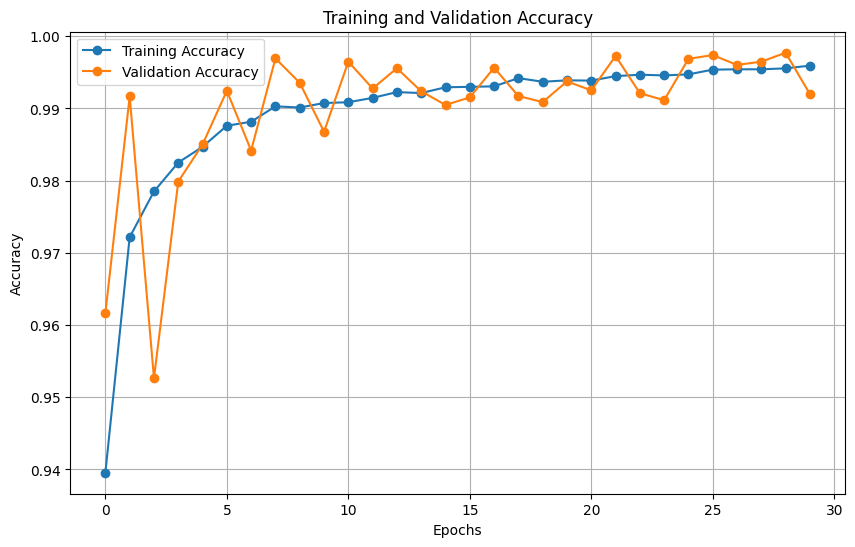

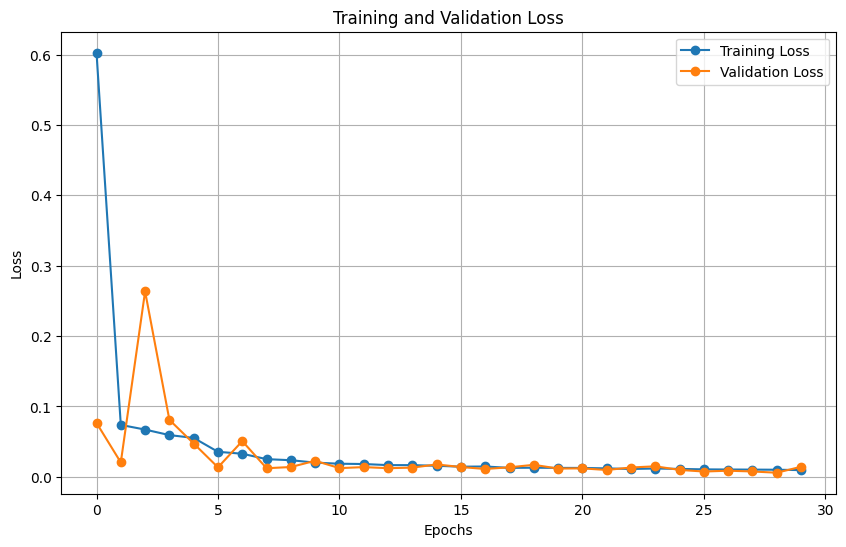

In [34]:
#training and validation accuracy loss 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Preparing the data
X = dataframe.drop('Precip', axis=1).values
y = dataframe['Precip'].values
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes=num_classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training the model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Plotting Accuracy and Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


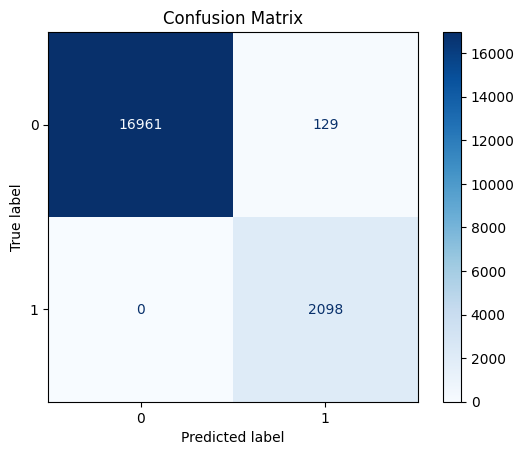

In [35]:
#confussion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(dataframe['Precip']))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


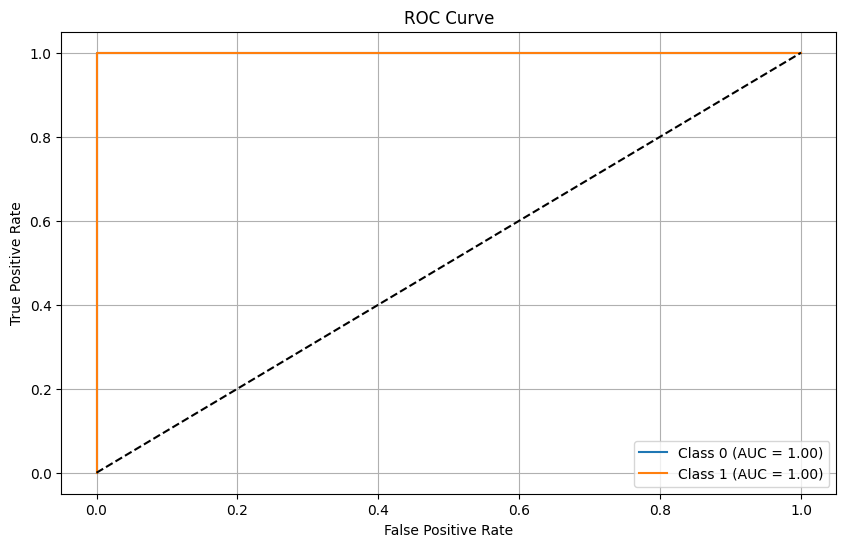

In [36]:
#roc and auc
from sklearn.metrics import roc_curve, auc

# ROC Curve
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], model.predict(X_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


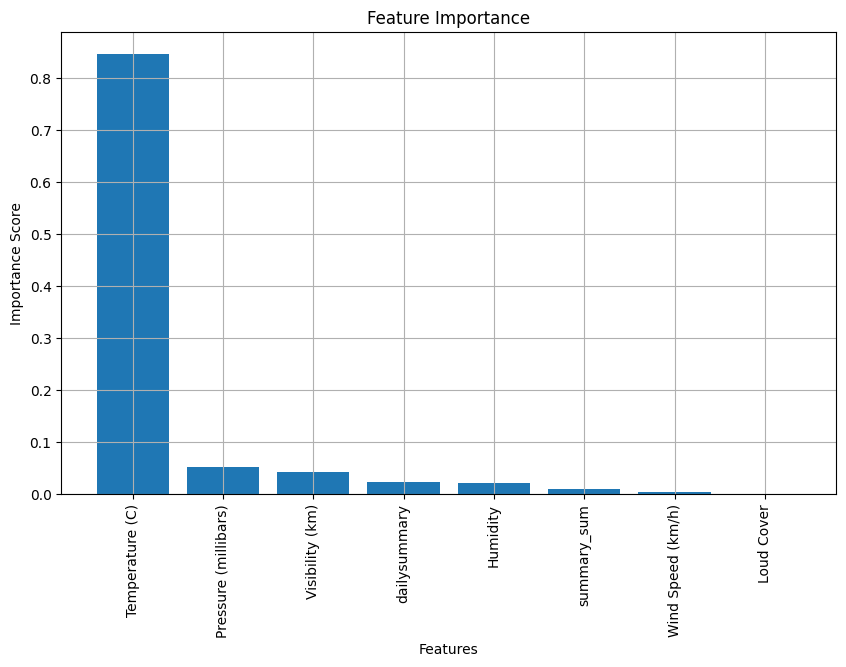

In [37]:
#feature importance random forest
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, np.argmax(y_train, axis=1))

# Feature Importance
importances = rf_model.feature_importances_
feature_names = dataframe.drop('Precip', axis=1).columns
sorted_indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.grid(True)
plt.show()


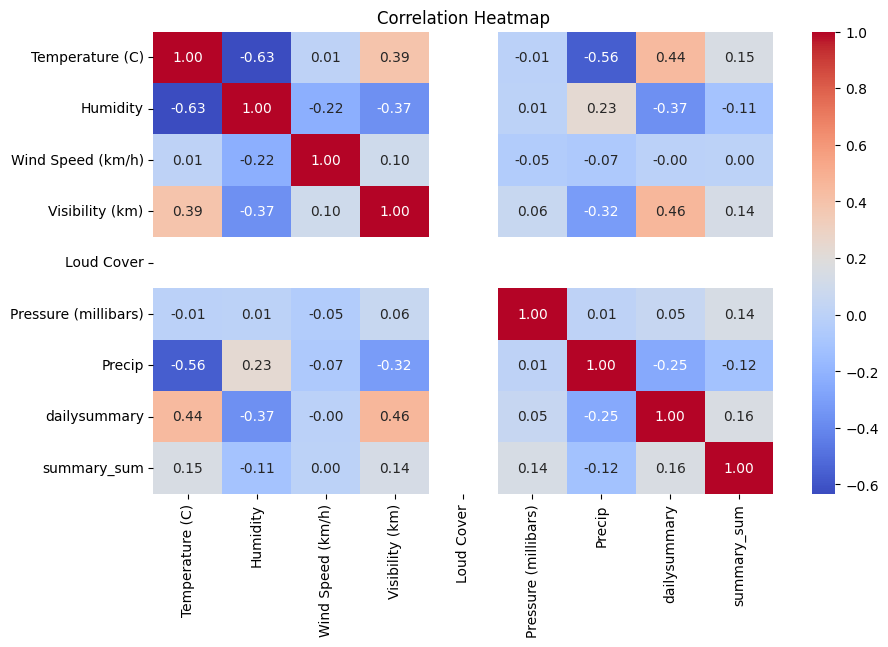

In [43]:
#correlation heatmap
import seaborn as sns

# Correlation matrix
correlation_matrix = dataframe.corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


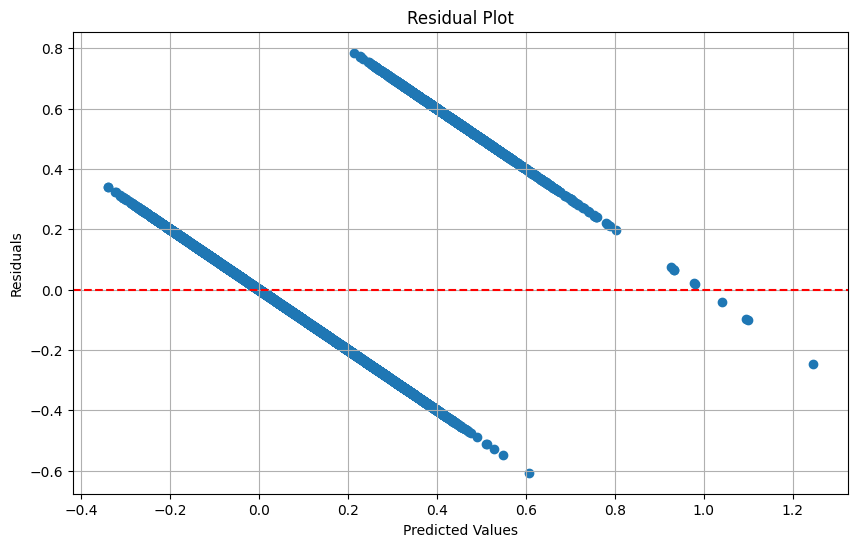

In [44]:
#residual plot
from sklearn.linear_model import LinearRegression

# Train a simple regression model
lr_model = LinearRegression()
lr_model.fit(X_train, np.argmax(y_train, axis=1))
y_pred = lr_model.predict(X_test)

# Residuals
residuals = np.argmax(y_test, axis=1) - y_pred

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


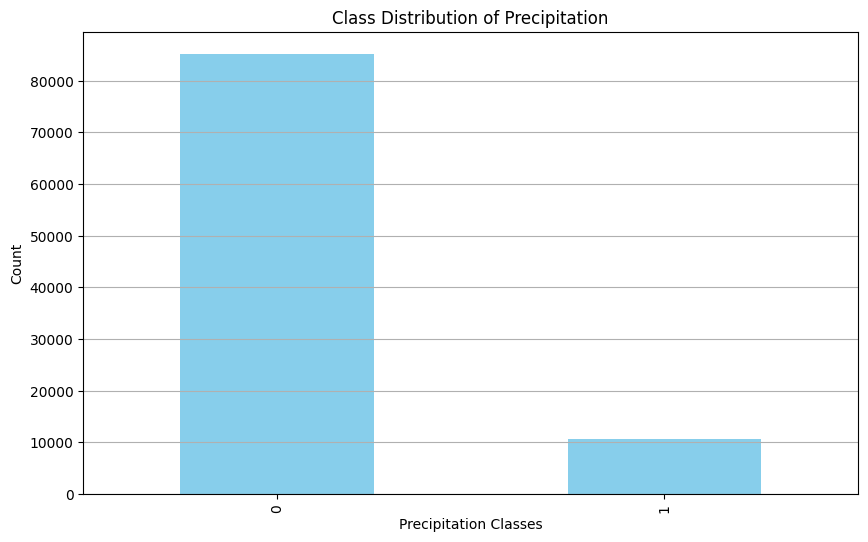

In [45]:
#class distrivuton
# Class distribution in the dataset
class_counts = dataframe['Precip'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Precipitation')
plt.xlabel('Precipitation Classes')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


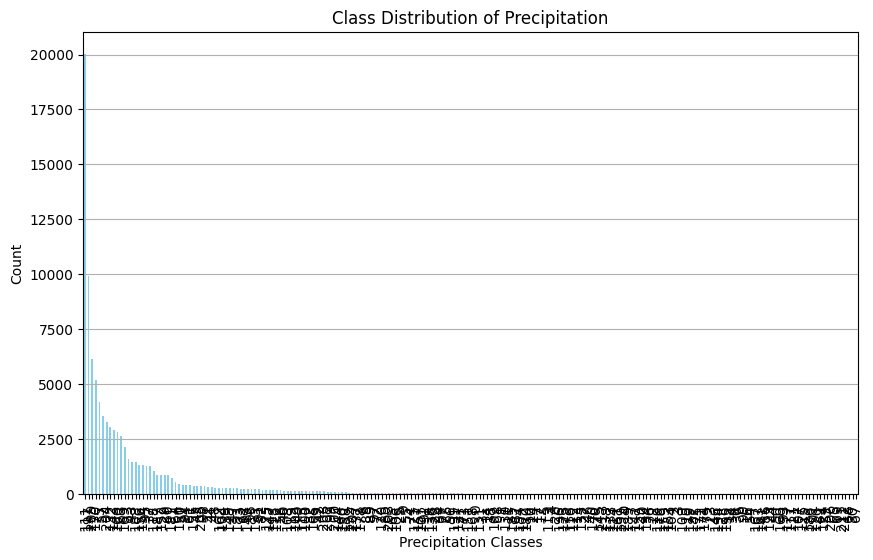

In [49]:
#class distrivuton
# Class distribution in the dataset
class_counts = dataframe['dailysummary'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Precipitation')
plt.xlabel('Precipitation Classes')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


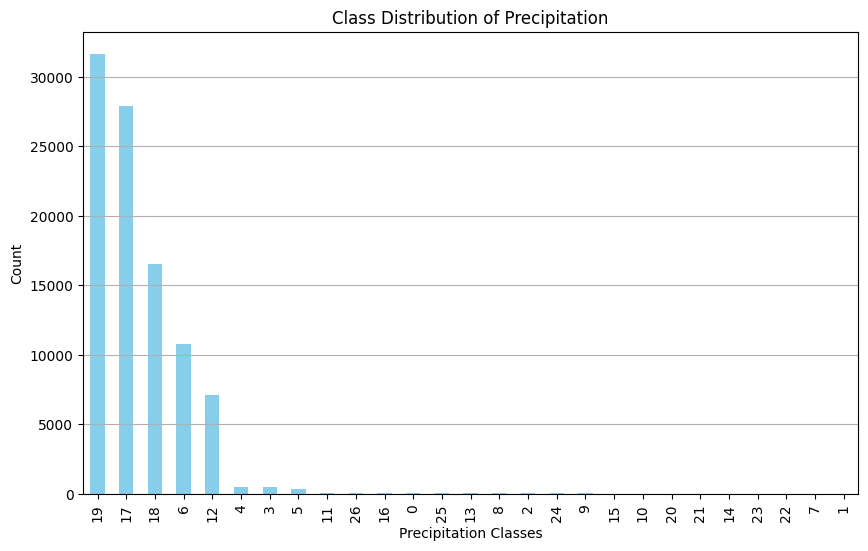

In [50]:

#class distrivuton
# Class distribution in the dataset
class_counts = dataframe['summary_sum'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Precipitation')
plt.xlabel('Precipitation Classes')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


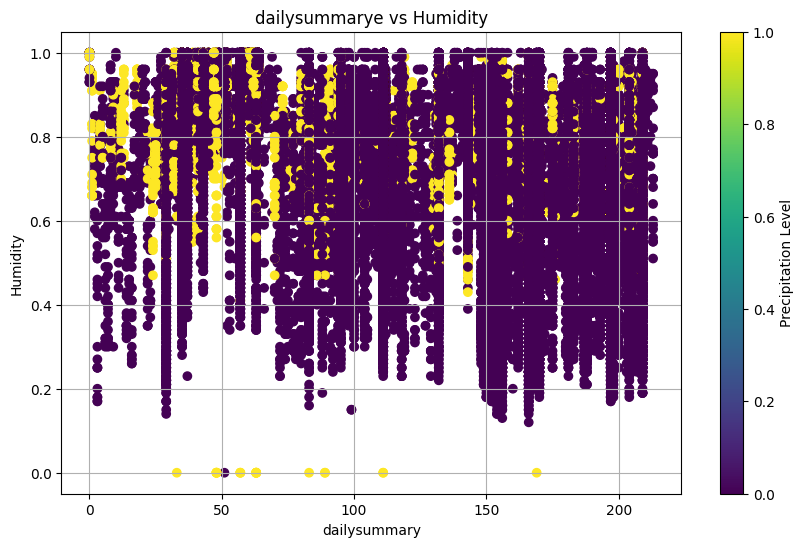

In [48]:
#scatter
# Scatter plot of two features (e.g., Temperature vs. Humidity)
plt.figure(figsize=(10, 6))
plt.scatter(dataframe['dailysummary'], dataframe['Humidity'], c=dataframe['Precip'], cmap='viridis')
plt.colorbar(label='Precipitation Level')
plt.title('dailysummarye vs Humidity')
plt.xlabel('dailysummary')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()


SVM

In [31]:
from sklearn.svm import SVC

In [32]:
from sklearn.datasets import make_classification

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.metrics import classification_report

In [35]:
svm_model = SVC(kernel='linear', random_state=42)

In [36]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [37]:
y_pred = svm_model.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17090
           1       0.99      1.00      0.99      2098

    accuracy                           1.00     19188
   macro avg       0.99      1.00      1.00     19188
weighted avg       1.00      1.00      1.00     19188



testing values

In [39]:
dataframe.head()

Temperature (C)  Humidity  Wind Speed (km/h)  Visibility (km)  Loud Cover  \
0         9.472222      0.89            14.1197          15.8263         0.0   
1         9.355556      0.86            14.2646          15.8263         0.0   
2         9.377778      0.89             3.9284          14.9569         0.0   
3         8.288889      0.83            14.1036          15.8263         0.0   
4         8.755556      0.83            11.0446          15.8263         0.0   

   Pressure (millibars)  Precip  dailysummary  summary_sum  
0               1015.13       0           197           19  
1               1015.63       0           197           19  
2               1015.94       0           197           17  
3               1016.41       0           197           19  
4               1016.51       0           197           17

In [40]:
test_pred = classifier.predict(np.array([[-1.244444,-1.244444,0.99,2.4955,291.0,1012,1,7]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [41]:
test_pred

array([1])

In [42]:
test_pred = classifier.predict(np.array([[9.472222,14.1197,15.8263,0.0,0.89,1015.13,197,19]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [43]:
test_pred

array([0])

In [ ]:
test_pred = classifier.predict(np.array([[-1.244444,-1.244444,0.99,2.4955,291.0,1012,1,7]]))

ENSEMBLE

In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Define the ensemble using hard voting
# (We assume rf_model and svc_model are your pre-trained Random Forest and SVC models)
ensemble_model = VotingClassifier(
    estimators=[('RandomForest', classifier), ('SVC', svm_model)],
    voting='hard'  # Use 'hard' for majority voting
)

# Step 2: Fit the ensemble model
# Even though the individual models are pre-trained, the VotingClassifier must still be fitted
ensemble_model.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = ensemble_model.predict(X_test)

# Step 4: Evaluate the ensemble model
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# (Optional) Print a few predictions
print("Sample Test Predictions:", y_pred[:10])

Ensemble Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17090
           1       1.00      1.00      1.00      2098

    accuracy                           1.00     19188
   macro avg       1.00      1.00      1.00     19188
weighted avg       1.00      1.00      1.00     19188

Sample Test Predictions: [1 0 0 0 0 0 0 0 0 0]


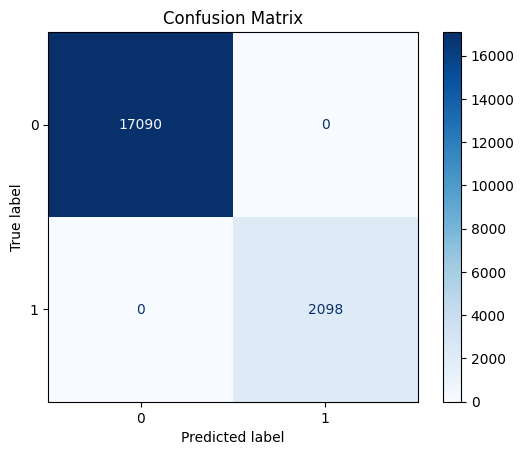

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


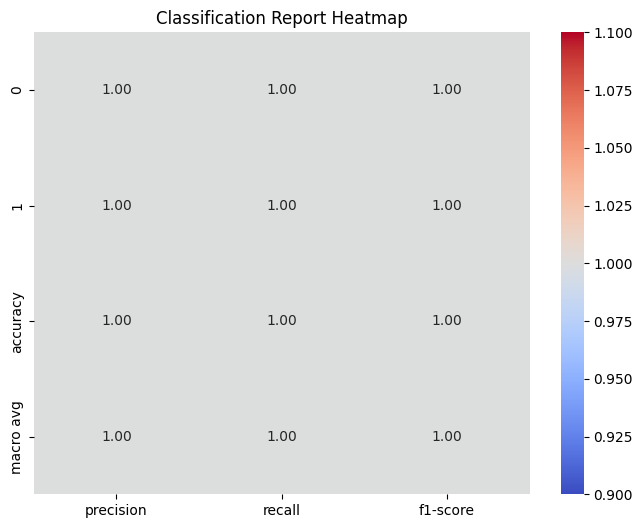

In [46]:
import seaborn as sns
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Classification Report Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

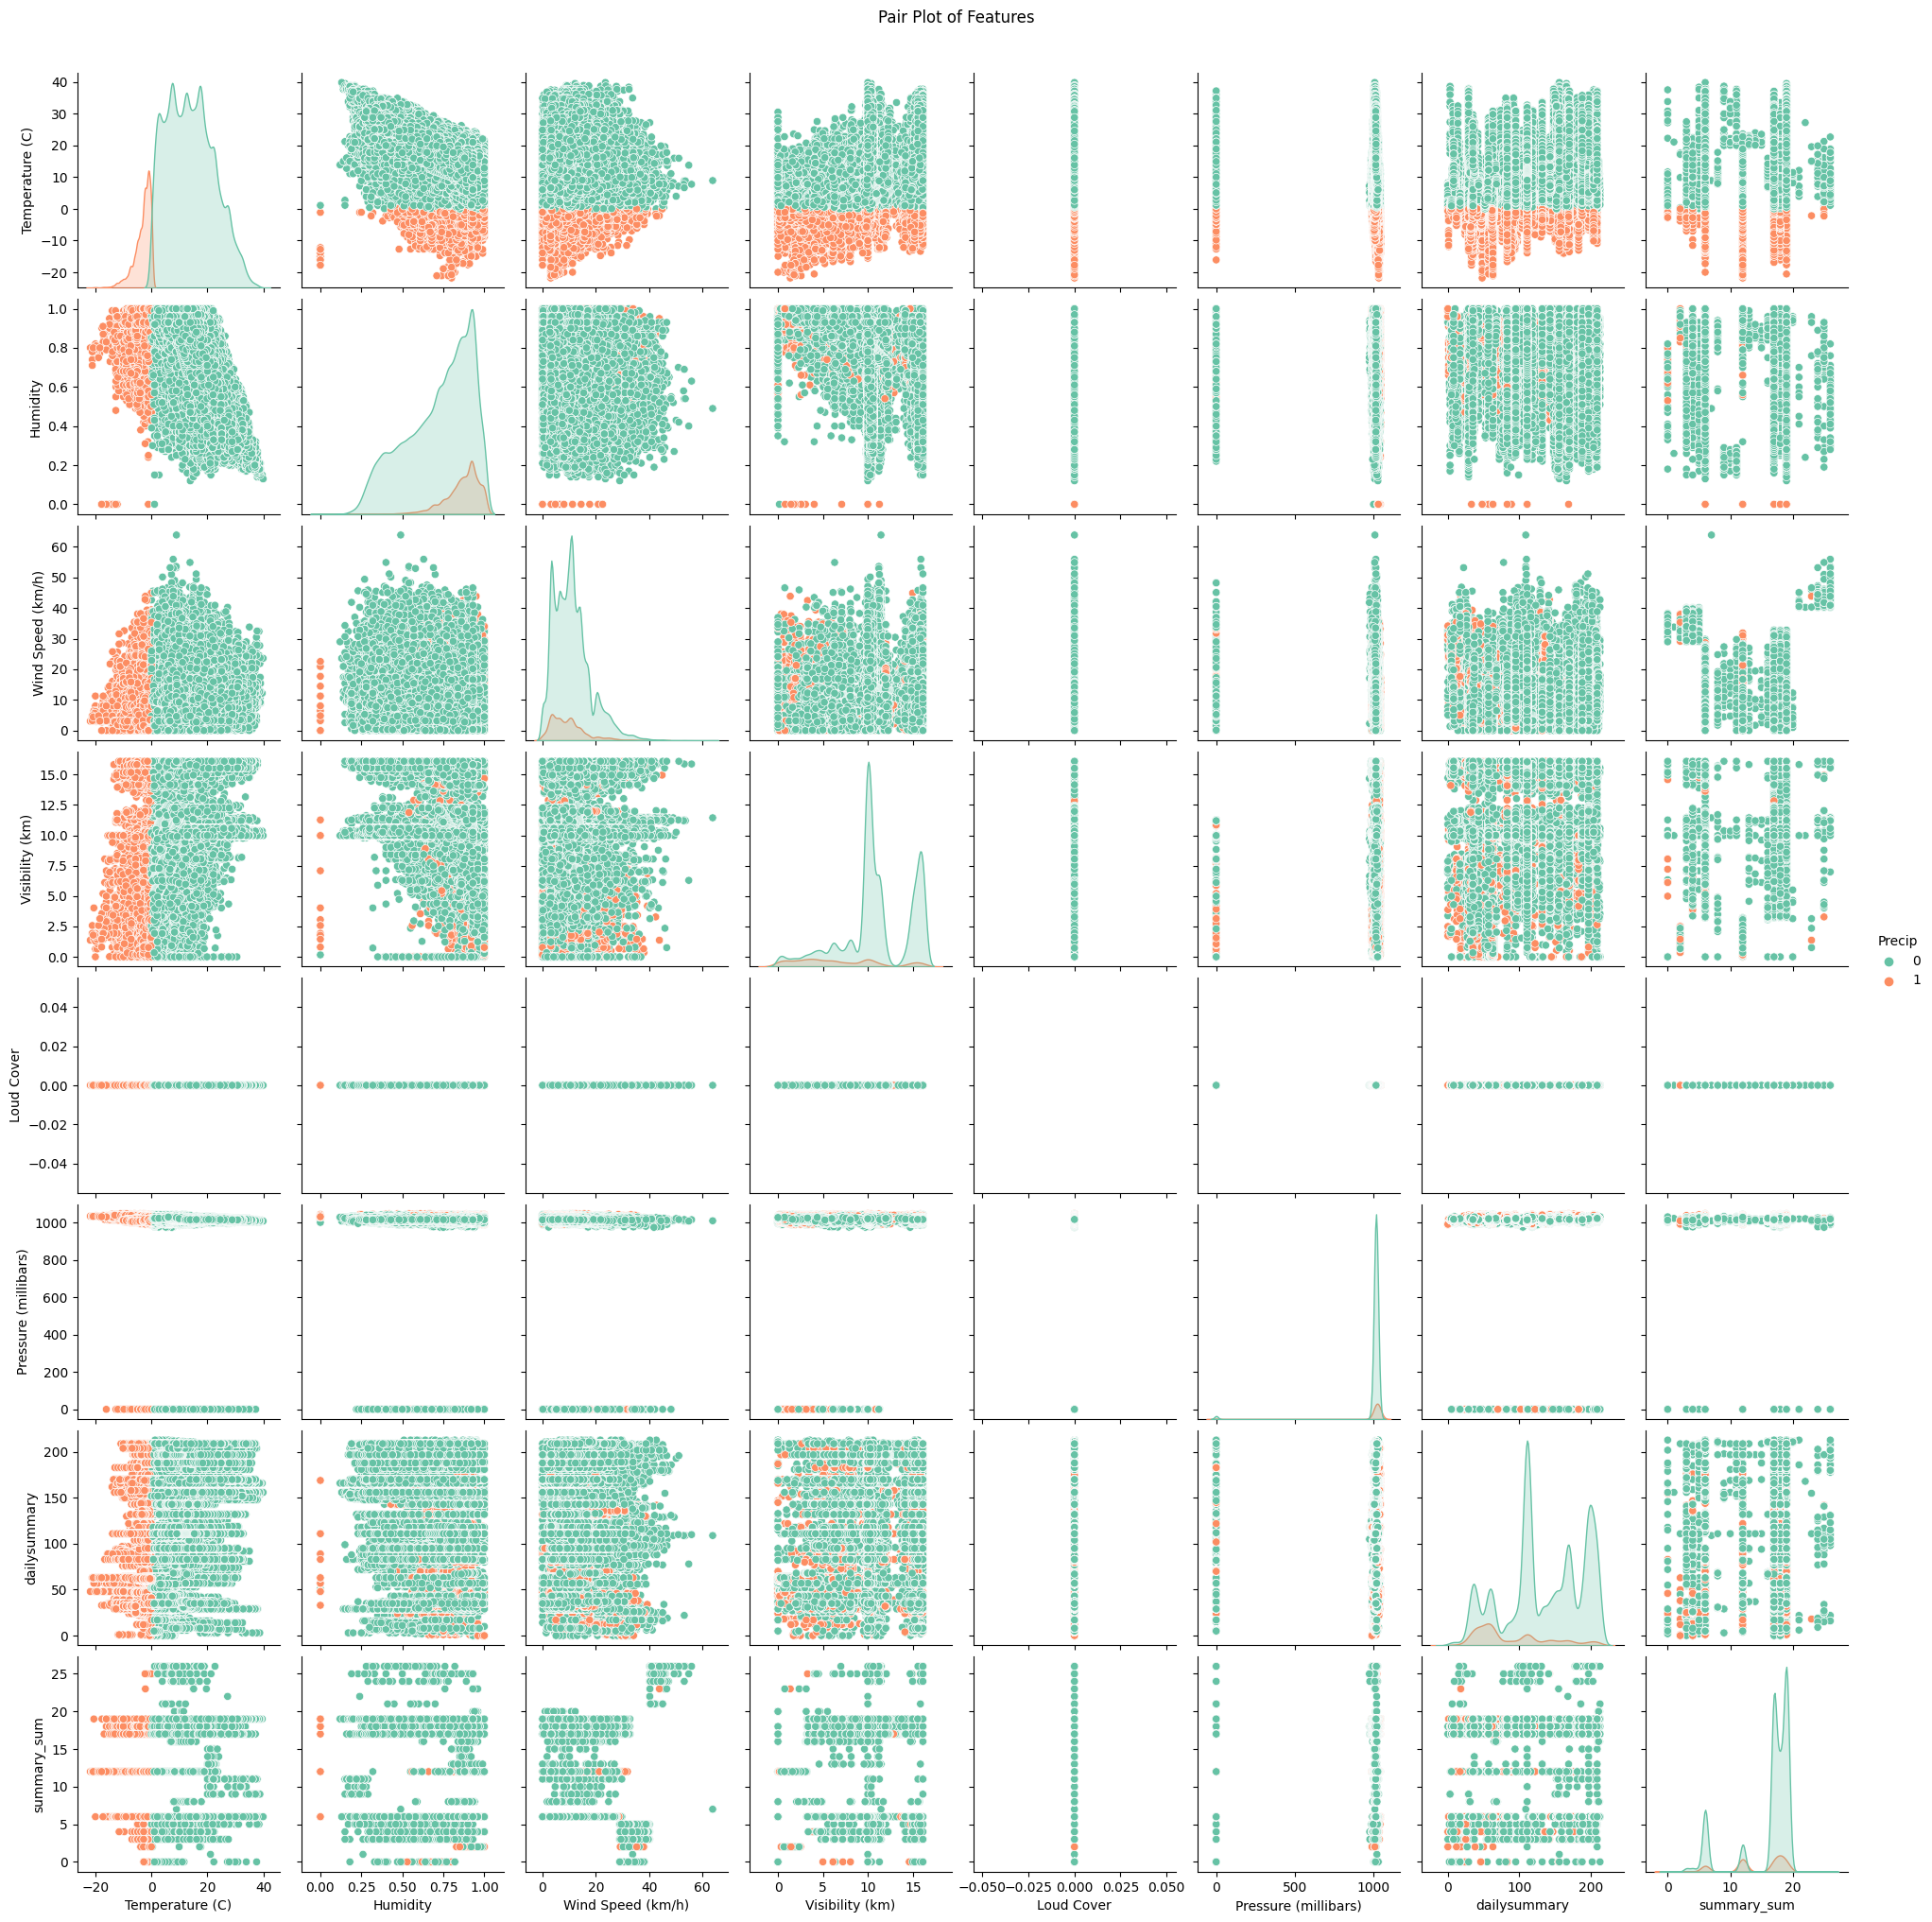

In [50]:
import seaborn as sns

# Combine X and y for visualization
combined_df = pd.concat([pd.DataFrame(X, columns=X.columns), pd.Series(y, name='Precip')], axis=1)

# Pair plot
sns.pairplot(combined_df, hue='Precip', diag_kind='kde', palette='Set2')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

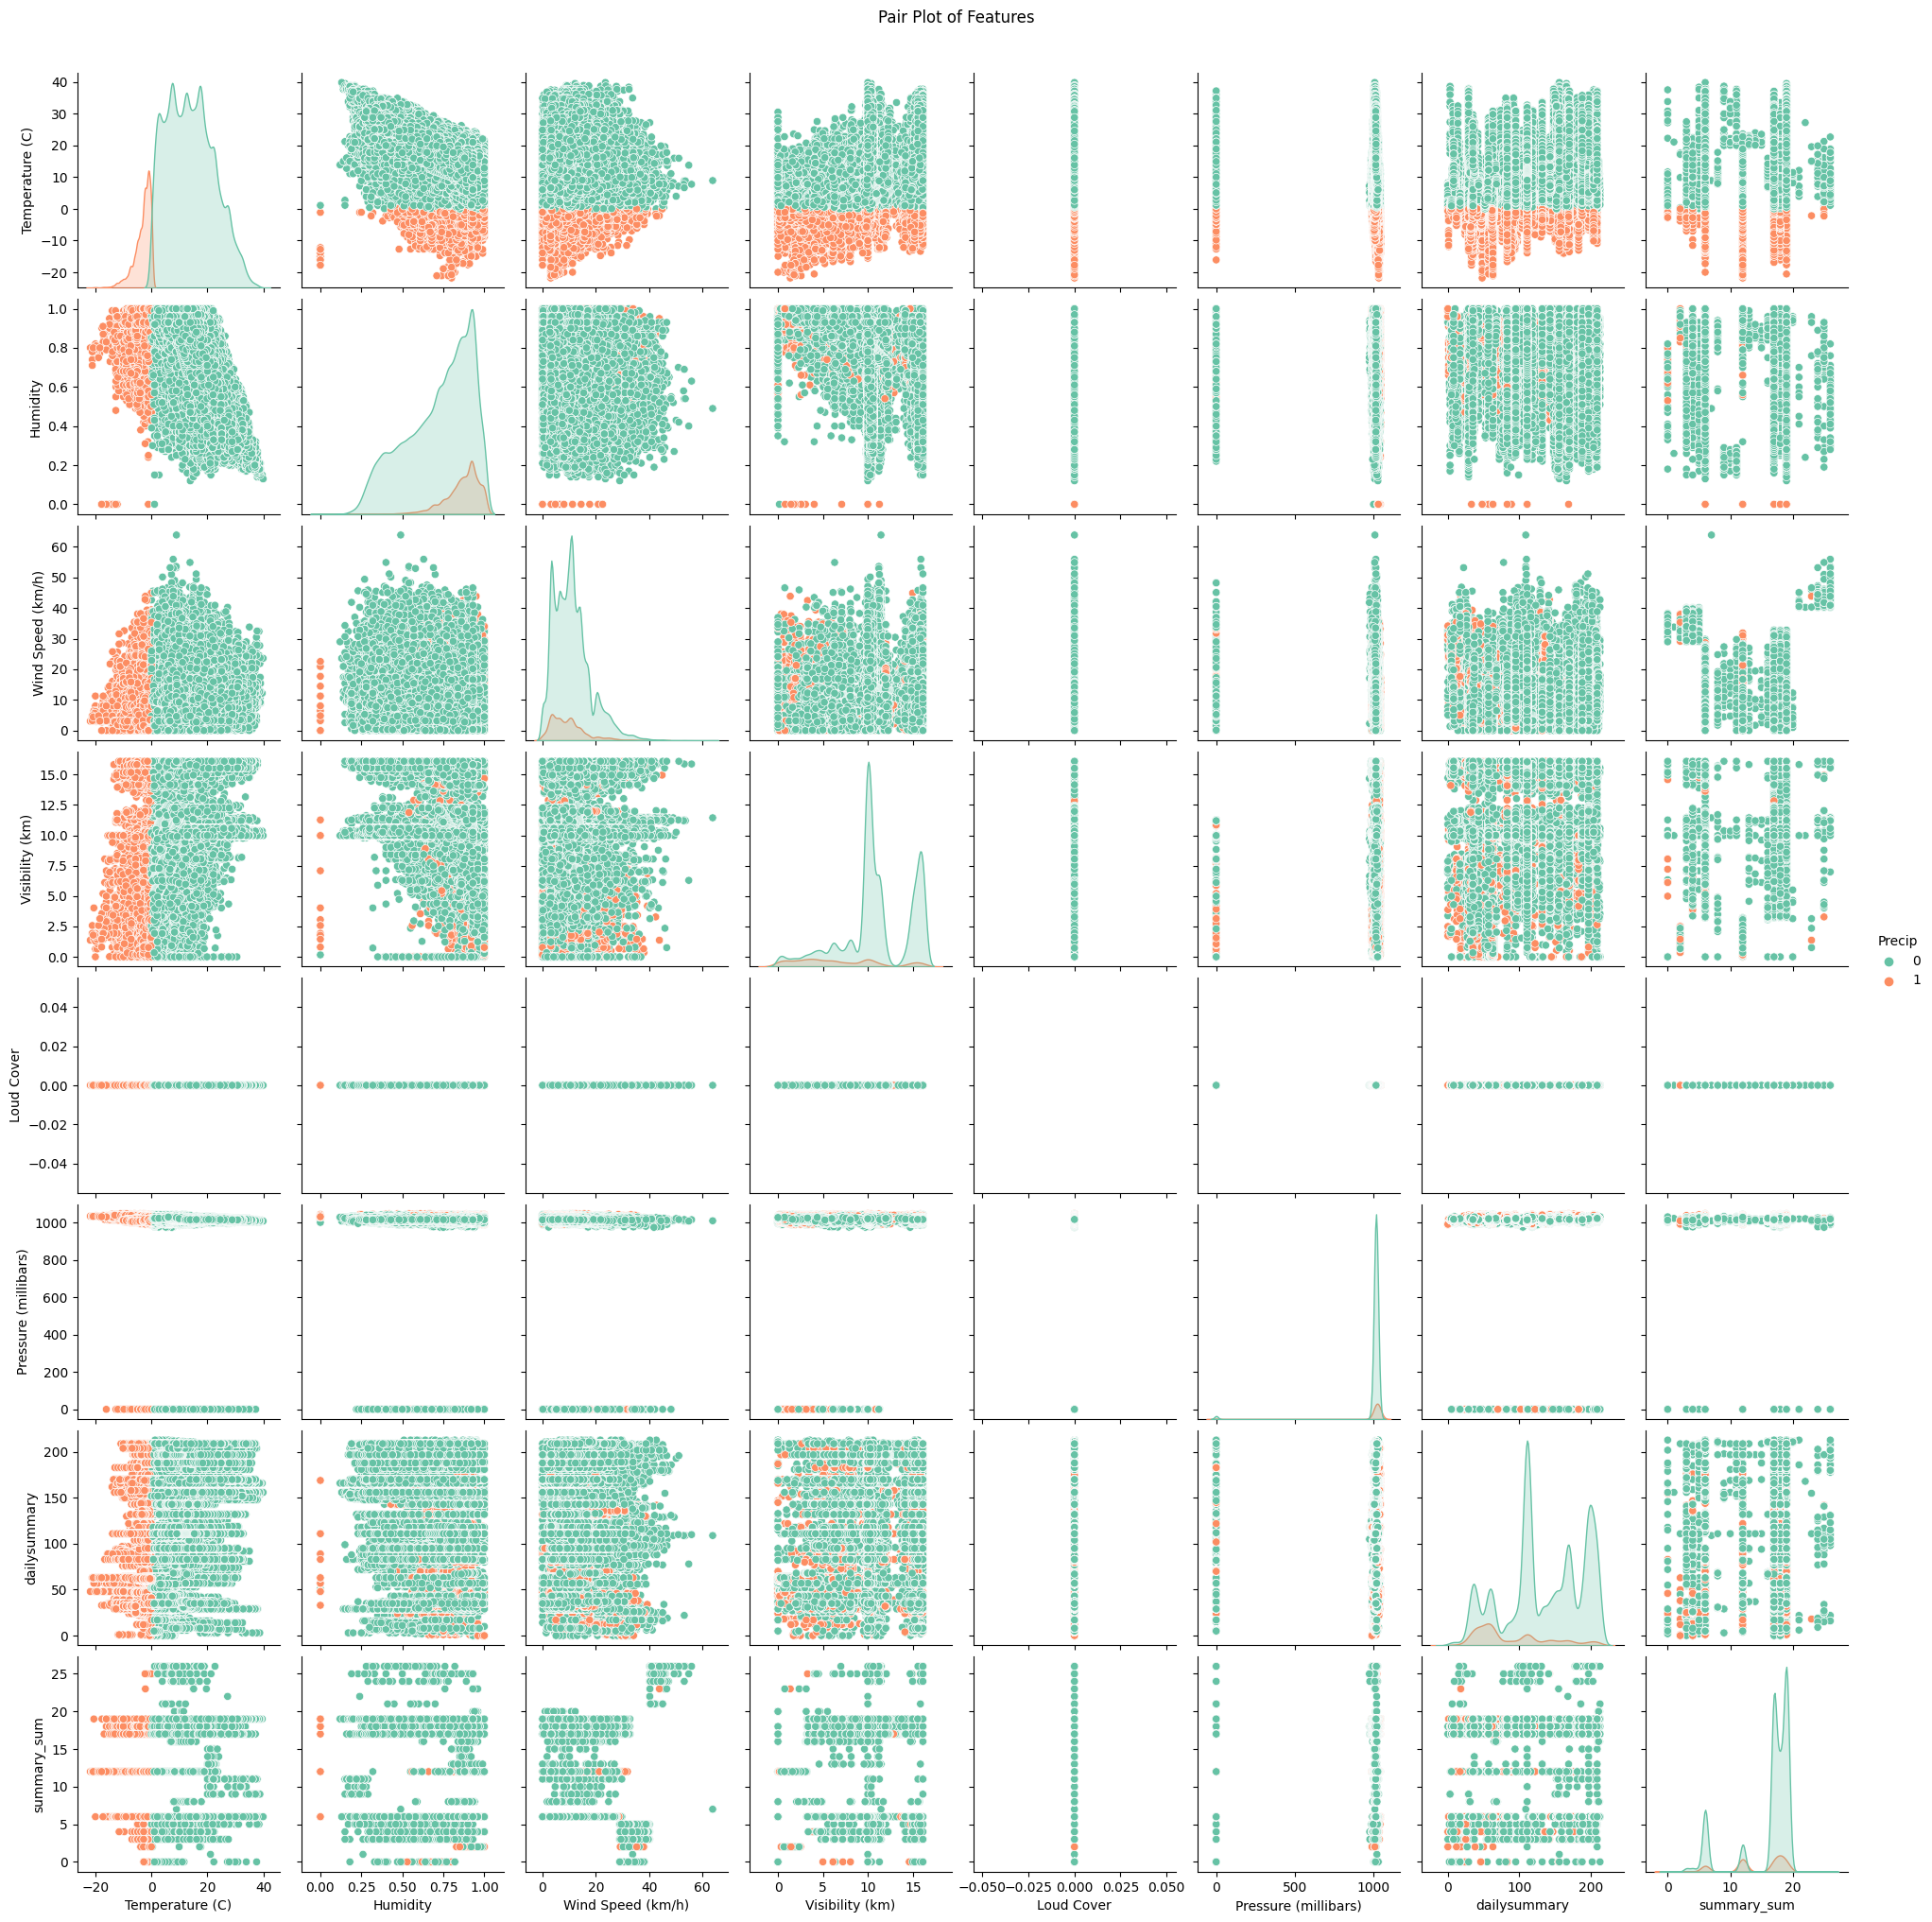

Plot saved as 'pair_plot.jpeg' in the /kaggle/working directory.


In [58]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Combine X and y for visualization
combined_df = pd.concat([pd.DataFrame(X, columns=X.columns), pd.Series(y, name='Precip')], axis=1)

# Pair plot
sns_plot = sns.pairplot(combined_df, hue='Precip', diag_kind='kde', palette='Set2')
sns_plot.fig.suptitle('Pair Plot of Features', y=1.02)

# Save the plot as a JPEG file
sns_plot.savefig('/kaggle/working/pair_plot.jpeg', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

print("Plot saved as 'pair_plot.jpeg' in the /kaggle/working directory.")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9232 - loss: 0.6064 - val_accuracy: 0.9906 - val_loss: 0.0311
Epoch 2/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9644 - loss: 0.1106 - val_accuracy: 0.9778 - val_loss: 0.0504
Epoch 3/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9816 - loss: 0.0493 - val_accuracy: 0.9881 - val_loss: 0.0203
Epoch 4/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9842 - loss: 0.0430 - val_accuracy: 0.9853 - val_loss: 0.0314
Epoch 5/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9857 - loss: 0.0345 - val_accuracy: 0.9930 - val_loss: 0.0169
Epoch 6/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9882 - loss: 0.0252 - val_accuracy: 0.9947 - val_loss: 0.0157
Epoch 7/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9891 - loss: 0.0229 - val_accuracy: 0.9931 - val_loss: 0.0161
Epoch 8/30
1919/1919 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9881 - loss: 0.0264 - 

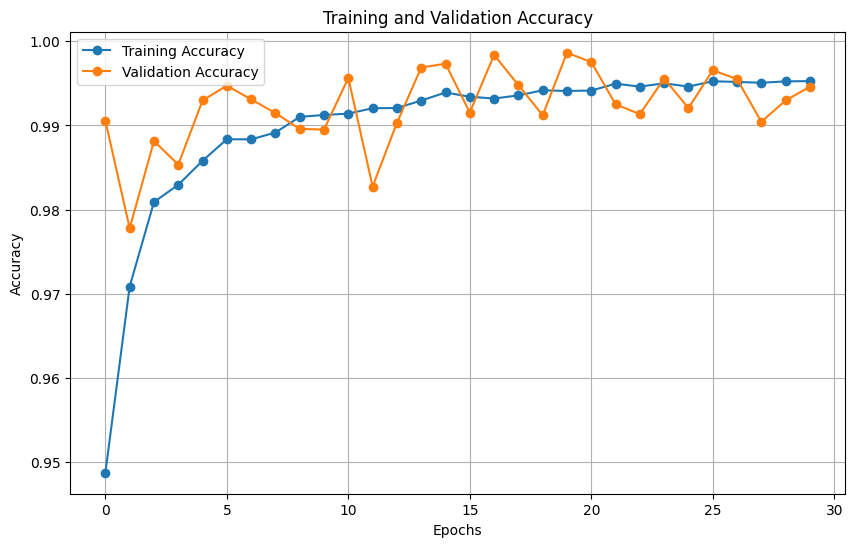

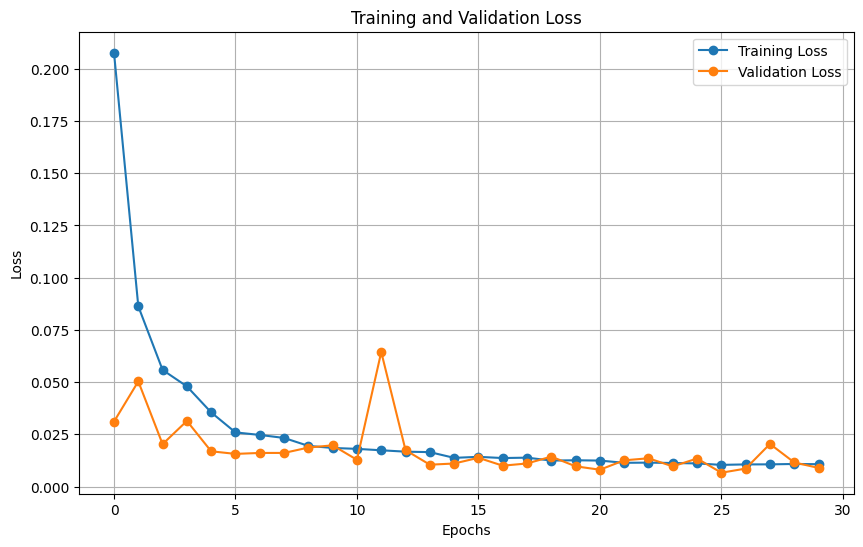

In [59]:
#training and validation accuracy loss 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Preparing the data
X = dataframe.drop('Precip', axis=1).values
y = dataframe['Precip'].values
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes=num_classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training the model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Plotting Accuracy and Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


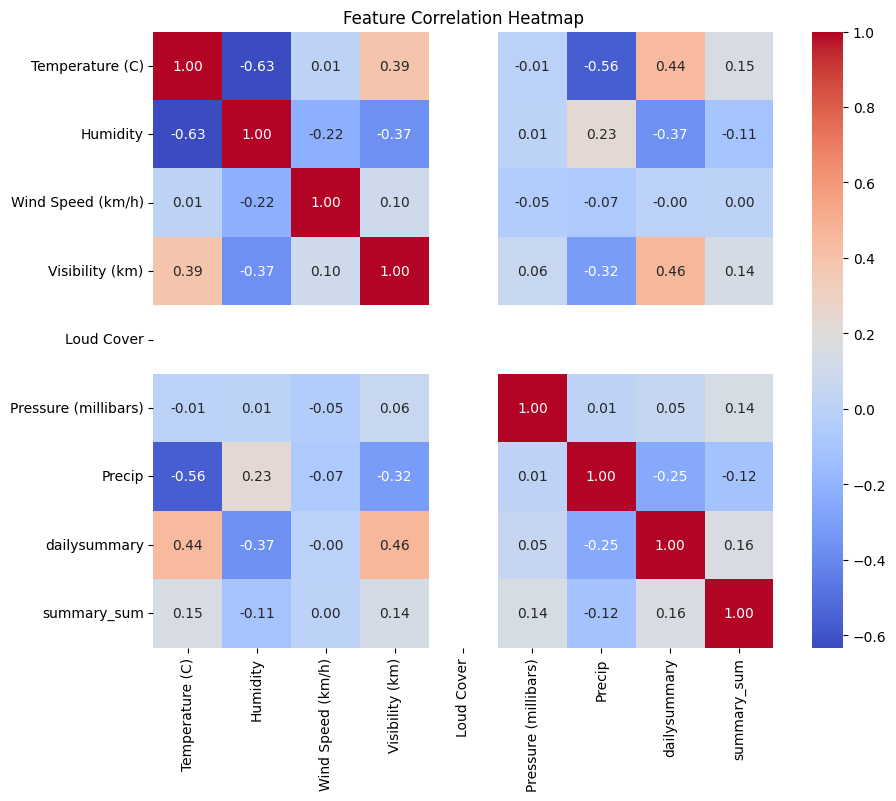

In [54]:
# Correlation heatmap
correlation_matrix = dataframe.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


In [55]:
import joblib
joblib.dump(classifier, 'ensemble_model.pkl')

['ensemble_model.pkl']

In [49]:
import joblib
joblib.dump(classifier, 'ensemble_model.pkl')

['ensemble_model.pkl']